In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extinction import add_colors_and_abs_mag, correct_flux_excess_factor
from download_isochrone import load_isochrone
from simbad_download import resolve_name

Configuration file not found:

    /home/maya/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# CMD diagram

In [2]:
CLUSTER_NAME: str = 'NGC 188'

In [3]:
cp_ra, cp_dec, cp_par, cp_pmra, cp_pmdec, cp_radvel = resolve_name(CLUSTER_NAME)

In [4]:
isochrone: np.ndarray = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

In [5]:
clustered: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
not_found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_not_found.csv')

In [6]:
clustered = add_colors_and_abs_mag(clustered)
found = add_colors_and_abs_mag(found)
not_found = add_colors_and_abs_mag(not_found)

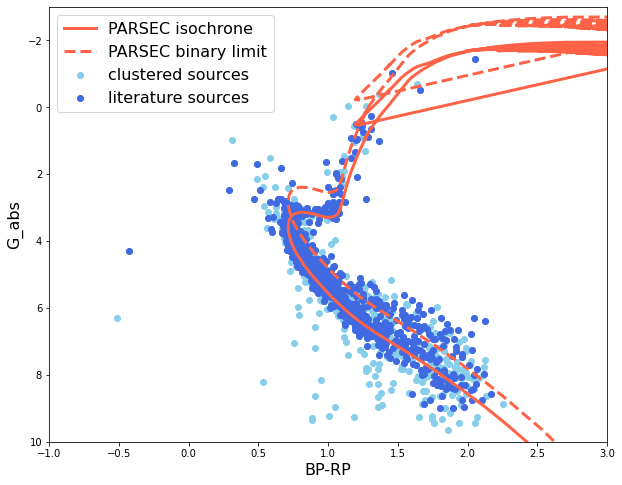

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', label='clustered sources');
plt.scatter(found['BP-RP'], found['G_abs'], color='royalblue', label='literature sources')
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend(fontsize=16);

# Not found?

In [8]:
print(f'{len(not_found)} literature sources were not clustered.')

100 literature sources were not clustered.


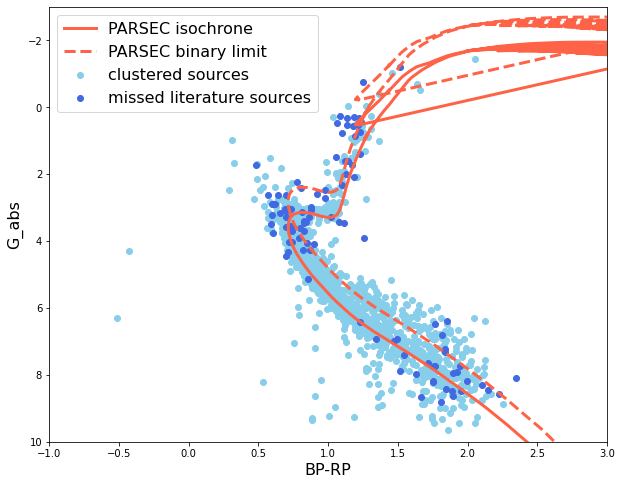

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', label='clustered sources');
plt.scatter(not_found['BP-RP'], not_found['G_abs'], color='royalblue', label='missed literature sources')
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend(fontsize=16);

In [10]:
def found_vs_not_found_hist(found: pd.DataFrame,
                            not_found: pd.DataFrame,
                            prop: str):
    plt.figure(figsize=(8, 5))
    plt.hist(found[prop], color='royalblue', alpha=0.5, label='Found literature sources', density=True, bins=50)
    plt.hist(not_found[prop], color='tomato', alpha=0.5, label='Missed literature sources', density=True, bins=20)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16);

In [11]:
def found_vs_not_found_hist_xlines(found: pd.DataFrame,
                                   not_found_values: list,
                                   prop: str):
    plt.figure(figsize=(8, 5))
    plt.hist(found[prop], color='royalblue', label='Found literature sources', density=True, bins=50)
    for val in not_found_values:
        plt.axvline(x=val, linestyle='--', color='black', linewidth=2)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16)

In [12]:
def not_found_hist(not_found: pd.DataFrame,
                   prop: str,
                   threshold: float = None):
    plt.figure(figsize=(8, 5))
    plt.hist(not_found[prop], color='tomato', label='Missed literature sources', density=True, bins=20)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16);
    if threshold:
        plt.axvline(x=threshold, linestyle='--', color='black', linewidth=2)

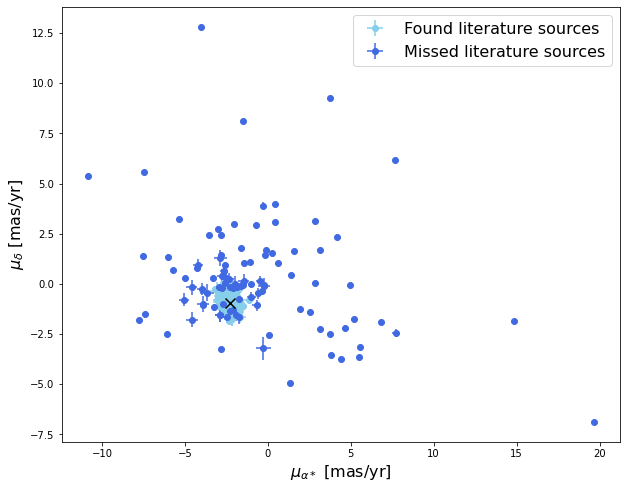

In [13]:
plt.figure(figsize=(10, 8))
plt.errorbar(found.pmra, found.pmdec, xerr=found.pmra_error,
             yerr=found.pmdec_error, color='skyblue', fmt='o', zorder=1,
             label='Found literature sources')
plt.errorbar(not_found.pmra, not_found.pmdec, xerr=not_found.pmra_error,
             yerr=not_found.pmdec_error, color='royalblue', fmt='o', zorder=1,
             label='Missed literature sources')
plt.scatter(cp_pmra, cp_pmdec, marker='x', color='black', s=100, zorder=2)
plt.gca().set_xlabel('$\mu_{\\alpha*}$ [mas/yr]', fontsize=16)
plt.gca().set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=16)
plt.legend(fontsize=16);

In [14]:
PMRA_STD = np.std(np.abs(found.pmra-cp_pmra))
PMDEC_STD = np.std(np.abs(found.pmdec-cp_pmdec))

correct_pm_mask = (np.abs(not_found.pmra-cp_pmra)<=6*PMRA_STD) & (np.abs(not_found.pmdec-cp_pmdec)<=6*PMDEC_STD)
len(not_found[correct_pm_mask])
correct_pm = not_found[correct_pm_mask]

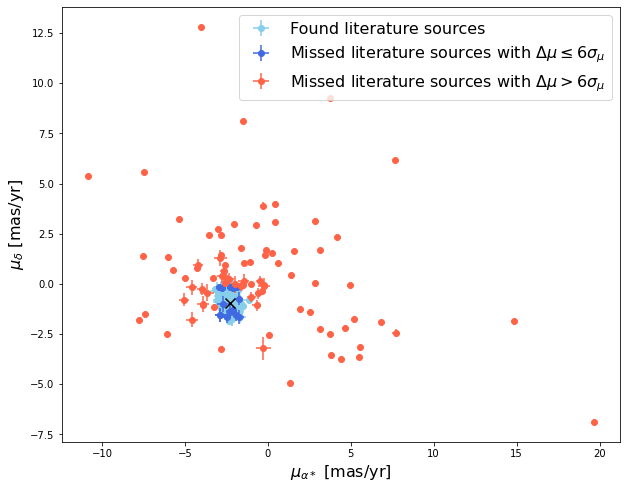

In [15]:
plt.figure(figsize=(10, 8))
plt.errorbar(found.pmra, found.pmdec, xerr=found.pmra_error,
             yerr=found.pmdec_error, color='skyblue', fmt='o', zorder=1,
             label='Found literature sources')

plt.errorbar(correct_pm.pmra, correct_pm.pmdec, xerr=correct_pm.pmra_error,
             yerr=correct_pm.pmdec_error, color='royalblue', fmt='o', zorder=2,
             label='Missed literature sources with $\Delta\mu\leq6\sigma_\mu$')

plt.errorbar(not_found[~correct_pm_mask].pmra, not_found[~correct_pm_mask].pmdec,
             xerr=not_found[~correct_pm_mask].pmra_error,
             yerr=not_found[~correct_pm_mask].pmdec_error, color='tomato',
             fmt='o', zorder=2,
             label='Missed literature sources with $\Delta\mu>6\sigma_\mu$')

plt.scatter(cp_pmra, cp_pmdec, marker='x', color='black', s=100, zorder=3)
plt.gca().set_xlabel('$\mu_{\\alpha*}$ [mas/yr]', fontsize=16)
plt.gca().set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=16)
plt.legend(fontsize=16);

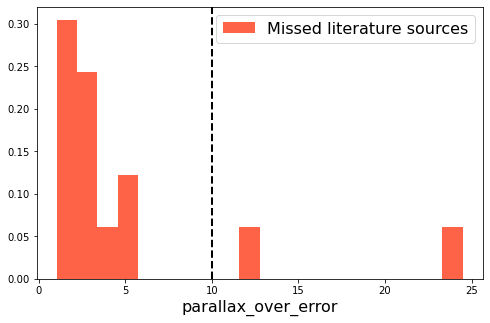

In [16]:
not_found_hist(correct_pm, 'parallax_over_error', 10.0);

In [17]:
correct_parallax = correct_pm[correct_pm.parallax_over_error>10]

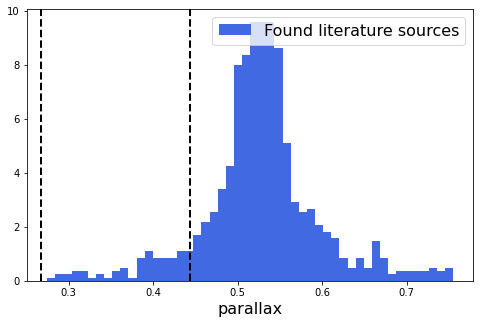

In [18]:
found_vs_not_found_hist_xlines(found, correct_parallax.parallax.values, 'parallax')

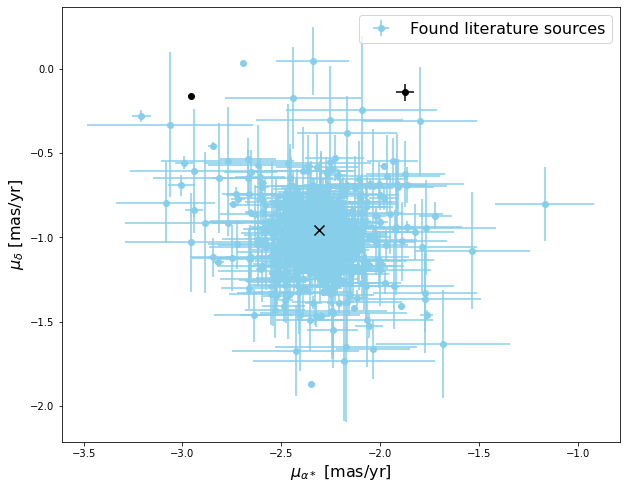

In [22]:
plt.figure(figsize=(10, 8))
plt.errorbar(found.pmra, found.pmdec, xerr=found.pmra_error,
             yerr=found.pmdec_error, color='skyblue', fmt='o', zorder=1,
             label='Found literature sources')

plt.errorbar(correct_parallax.pmra, correct_parallax.pmdec, fmt='o',
             xerr=correct_parallax.pmra_error, yerr=correct_parallax.pmdec_error,
             color='black')

plt.scatter(cp_pmra, cp_pmdec, marker='x', color='black', s=100, zorder=3)
plt.gca().set_xlabel('$\mu_{\\alpha*}$ [mas/yr]', fontsize=16)
plt.gca().set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=16)
plt.legend(fontsize=16);

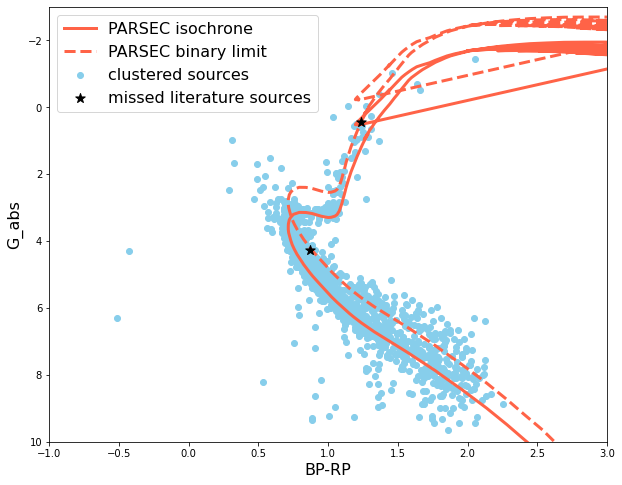

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue',
            label='clustered sources');
plt.scatter(correct_parallax['BP-RP'], correct_parallax['G_abs'], color='black',
            label='missed literature sources', zorder=3, marker='*', s=100)
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato',
         linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato',
         linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend(fontsize=16);